# Linear Regression

This notebook has some experiments of the linear regression methods implemented in linear_regression.py. Some parts of the experiments are based on Programming Exercise 1 of course Machine Learning on Coursera.

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 1
%aimport linear_regression

## Linear regression with one variable
> "Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities."

### Loading the dataset
> "The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss."

In [3]:
data = pd.read_csv('data/ex1data1.txt', sep=',', header=None)
data.columns = ['population', 'profit']

### Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


* The dataset has 97 examples
* Both population (feature) and profit (target feature) are of type float
* There are no missing values

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


#### Relationship between the feature and the target:

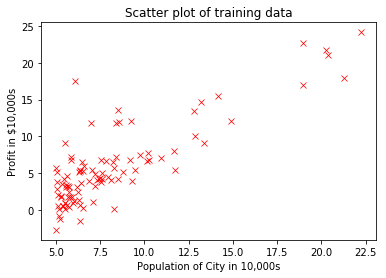

In [6]:
ax = sns.scatterplot(x='population', y='profit', data=data, marker='x', color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data');

The plot shows that they have a linear relationship.

### Gradient descent
Running gradient descent to find the optimum values of linear regression coeficients (theta), that is, fitting the model:

In [7]:
iterations = 1500
alpha = 0.01

In [8]:
fitted_model = linear_regression.fit(data.population.values, data.profit.values, 
                                     learning_rate=alpha, num_iterations=iterations,
                                     fit_method='gradient_descent')

In [9]:
fitted_model['theta']

array([[-3.63029144],
       [ 1.16636235]])

#### Using the fitted model to make predictions on profits in areas of 35,000 and 70,000 people:

In [10]:
y_pred = linear_regression.predict([3.5], fitted_model)
print('For population = 35,000, we predict a profit of ', y_pred[0,0]*10000)

For population = 35,000, we predict a profit of  4519.7678677017675


In [11]:
y_pred = linear_regression.predict([7], fitted_model)
print('For population = 70,000, we predict a profit of ', y_pred[0,0]*10000)

For population = 70,000, we predict a profit of  45342.45012944714


#### Plot the linear fit:

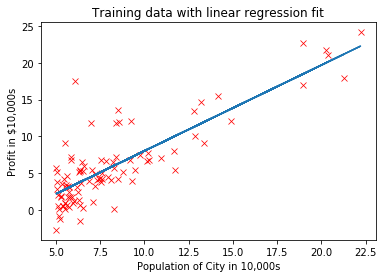

In [12]:
ax = sns.scatterplot(x='population', y='profit', data=data, marker='x', color='r')
plt.plot(fitted_model['X'][:,1], fitted_model['X'].dot(fitted_model['theta']))
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');

#### Visualizing the cost function J($\theta$):

In [13]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [14]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [15]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = linear_regression.compute_cost(fitted_model['X'], 
                                                     np.array(data.profit.values).reshape(-1,1),
                                                     [[theta0_vals[i]], [theta1_vals[j]]])

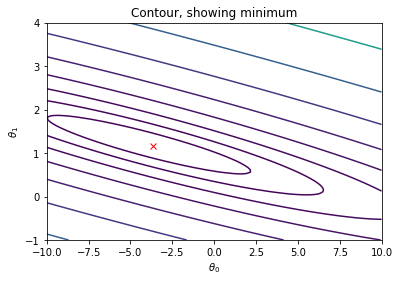

In [16]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(fitted_model['theta'][0,0], fitted_model['theta'][1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

## Linear Regression with multiple variables
> "Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices."

### Loading the dataset
> "The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house."

In [17]:
data2 = pd.read_csv('data/ex1data2.txt', sep=',', header=None)
data2.columns = ['house_size', 'bedrooms', 'house_price']

### Exploratory data analysis

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
house_size     47 non-null int64
bedrooms       47 non-null int64
house_price    47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


* The dataset has 47 examples
* All the features are of type int
* There are no missing values

In [19]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> "House sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly."

### Gradient descent
Running gradient descent to find the optimum values of linear regression coeficients (theta), that is, fitting the model.

In [20]:
iterations = 1500
alpha = 0.01

In [21]:
fitted_model = linear_regression.fit(data2[['house_size', 'bedrooms']], data2.house_price.values, 
                                     learning_rate=alpha, num_iterations=iterations,
                                     normalize=True,fit_method='gradient_descent')

In [22]:
fitted_model['theta']

array([[340412.56301439],
       [110540.56654627],
       [ -6558.99054811]])

#### Selecting learning rates

In [23]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

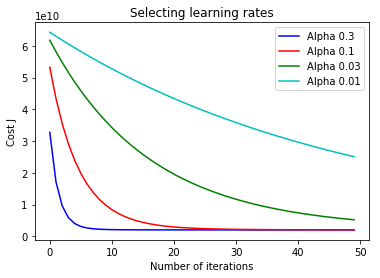

In [24]:
for i in range(0, len(alpha)):
    fitted_model = linear_regression.fit(data2[['house_size', 'bedrooms']], data2.house_price.values, 
                                         learning_rate=alpha[i], num_iterations=num_iters,
                                         normalize=True,fit_method='gradient_descent')
    plt.plot(range(len(fitted_model['J_history'])), fitted_model['J_history'], colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

#### Fitting the model again with the best learning rate:

In [25]:
alpha = 0.1
num_iters = 250
fitted_model = linear_regression.fit(data2[['house_size', 'bedrooms']], data2.house_price.values, 
                                     learning_rate=alpha, num_iterations=num_iters,
                                     normalize=True,fit_method='gradient_descent')

In [26]:
fitted_model['theta']

array([[340412.65957323],
       [110630.07624443],
       [ -6648.5002364 ]])

#### Estimate the price of a 1650 sq-ft, 3 bedrooms house

In [27]:
y_pred = linear_regression.predict([[1650.0, 3.0]], fitted_model)
print('Price of a house with 1650 square feet and 3 bedrooms: $', y_pred[0,0])

Price of a house with 1650 square feet and 3 bedrooms: $ 293081.6762816132


## Normal Equation
>"The closed-form solution to linear regression is $\theta = {(X^T X)}^{-1} X^Ty$. Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent."

In [28]:
fitted_model = linear_regression.fit(data2[['house_size', 'bedrooms']], data2.house_price.values, 
                                     fit_method='normal_equation')

In [29]:
fitted_model['theta']

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

#### Estimate the price of a 1650 sq-ft, 3 bedrooms house

In [30]:
y_pred = linear_regression.predict([[1650.0, 3.0]], fitted_model)
print('Price of a house with 1650 square feet and 3 bedrooms: $', y_pred[0,0])

Price of a house with 1650 square feet and 3 bedrooms: $ 293081.4643349717
